Index(['country', 'mined_raw_mat', 'unit', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')


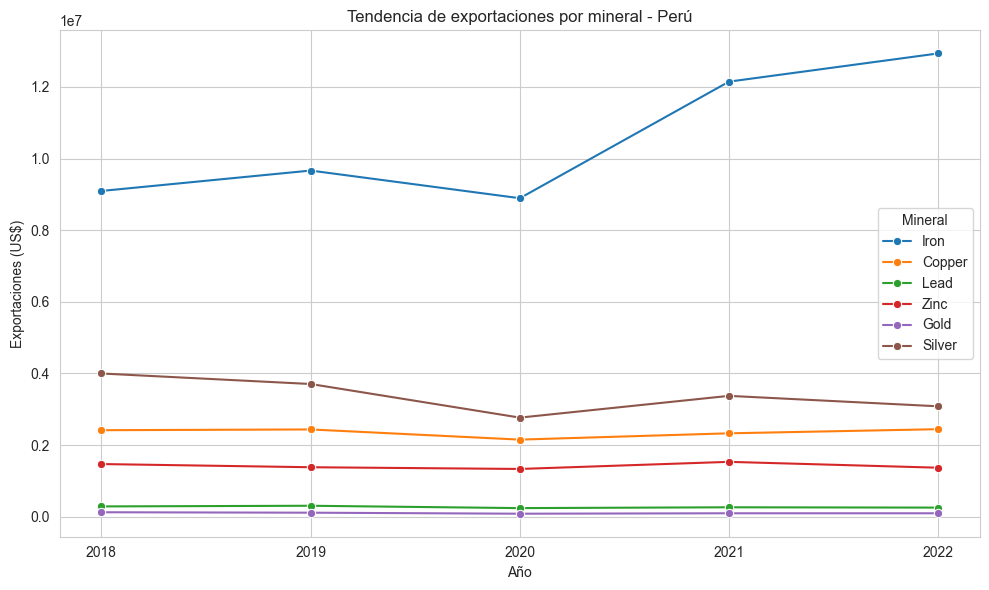

C:\Users\SUITE\AppData\Local\Temp\ipykernel_5752\999145942.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ranking.values, y=df_ranking.index, palette="viridis")


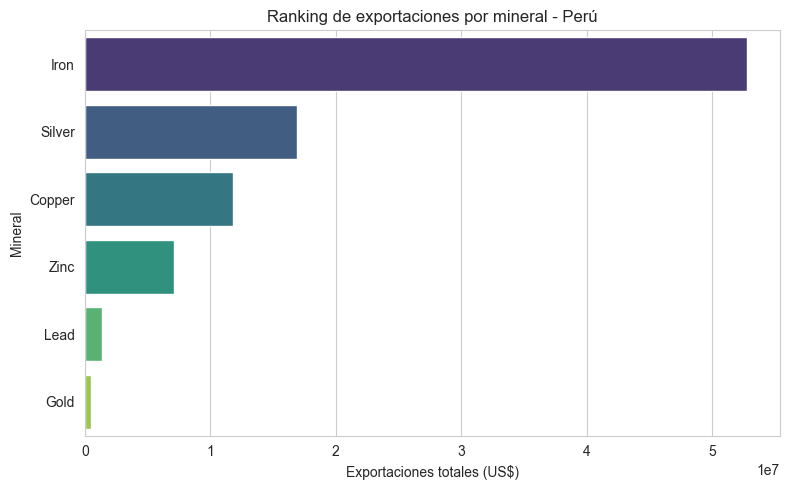

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Cargar CSV
df_commodities = pd.read_csv("../data/raw/world_mining_commodities_clean.csv", on_bad_lines='skip')

# Columnas disponibles
print(df_commodities.columns)

# Filtrar Perú y minerales clave
minerales_clave = ['Copper', 'Gold', 'Zinc', 'Lead', 'Silver', 'Iron']
df_peru = df_commodities[df_commodities['country'] == 'Peru']
df_peru = df_peru[df_peru['mined_raw_mat'].isin(minerales_clave)]

# Convertir a formato largo para gráficos
df_peru_long = df_peru.melt(
    id_vars=['country', 'mined_raw_mat', 'unit'],
    value_vars=['2018', '2019', '2020', '2021', '2022'],
    var_name='year',
    value_name='export_value'
)

# Convertir export_value a numérico
df_peru_long['export_value'] = pd.to_numeric(df_peru_long['export_value'], errors='coerce')

# Gráfico de tendencias por mineral
plt.figure(figsize=(10,6))
sns.lineplot(data=df_peru_long, x='year', y='export_value', hue='mined_raw_mat', marker='o')
plt.title("Tendencia de exportaciones por mineral - Perú")
plt.ylabel("Exportaciones (US$)")
plt.xlabel("Año")
plt.legend(title="Mineral")
plt.tight_layout()
plt.show()

# Ranking total por mineral
df_ranking = df_peru_long.groupby('mined_raw_mat')['export_value'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=df_ranking.values, y=df_ranking.index, palette="viridis")
plt.title("Ranking de exportaciones por mineral - Perú")
plt.xlabel("Exportaciones totales (US$)")
plt.ylabel("Mineral")
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd

# Commodities
df_commodities = pd.read_csv("../data/raw/world_mining_commodities_clean.csv", on_bad_lines='skip')

# Companies
df_companies = pd.read_csv("../data/raw/116_world_mining_companies_clean.csv", on_bad_lines='skip')

# Commodity info (Excel)
df_info = pd.read_excel("../data/raw/commodity_info.xlsx")


In [19]:
# Revisar las primeras filas y columnas
print(df_commodities.head())
print(df_commodities.columns)

print(df_companies.head())
print(df_companies.columns)

print(df_info.head())
print(df_info.columns)


       country mined_raw_mat unit      2018      2019     2020      2021  \
0  Afghanistan      Chromium  (t)    2000.0    2000.0   2000.0    5300.0   
1  Afghanistan     Fluorspar  (t)   10000.0   50000.0  10000.0   10000.0   
2  Afghanistan        Gypsum  (t)   36161.0   24682.0  21779.0   16349.0   
3  Afghanistan          Salt  (t)   47944.0   41157.0  12015.0   10700.0   
4  Afghanistan          Talc  (t)  356789.0  345052.0  95923.0  441372.0   

       2022  
0   19100.0  
1   27600.0  
2   10991.0  
3   41573.0  
4  382211.0  
Index(['country', 'mined_raw_mat', 'unit', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
                                                Name  \
0  Abcourt Mines Inc,TSXV: ABI - $26M (CAD),"Deve...   
1                                 Aben Minerals Ltd.   
2  Aftermath Silver,TSXV: AAG,Exploration,Silver,...   
3  Amex Exploration,TSXV: AMX - $171M (CAD),Explo...   
4  Anglo American,LSE: AAL - $289M (GBP),"Product...   

  Ticker 

In [20]:
minerales_clave = ['Copper', 'Gold', 'Zinc', 'Lead', 'Silver', 'Iron']

# Filtrar Perú
df_peru = df_commodities[df_commodities['country'] == 'Peru']

# Filtrar solo los minerales clave
df_peru = df_peru[df_peru['mined_raw_mat'].isin(minerales_clave)]

# Revisar resultados
print(df_peru)


     country mined_raw_mat  unit       2018       2019       2020        2021  \
1205    Peru          Iron   (t)  9096994.0  9666412.0  8893972.0  12149274.0   
1211    Peru        Copper   (t)  2416881.0  2437925.0  2153952.0   2329886.0   
1213    Peru          Lead   (t)   288796.0   307021.0   241548.0    264427.0   
1216    Peru          Zinc   (t)  1471846.0  1382753.0  1334570.0   1533135.0   
1217    Peru          Gold  (kg)   125934.0   113586.0    85173.0     97190.0   
1218    Peru        Silver  (kg)  3999990.0  3706760.0  2768240.0   3375645.0   

            2022  
1205  12936826.0  
1211   2445271.0  
1213    255443.0  
1216   1369649.0  
1217     96966.0  
1218   3084039.0  


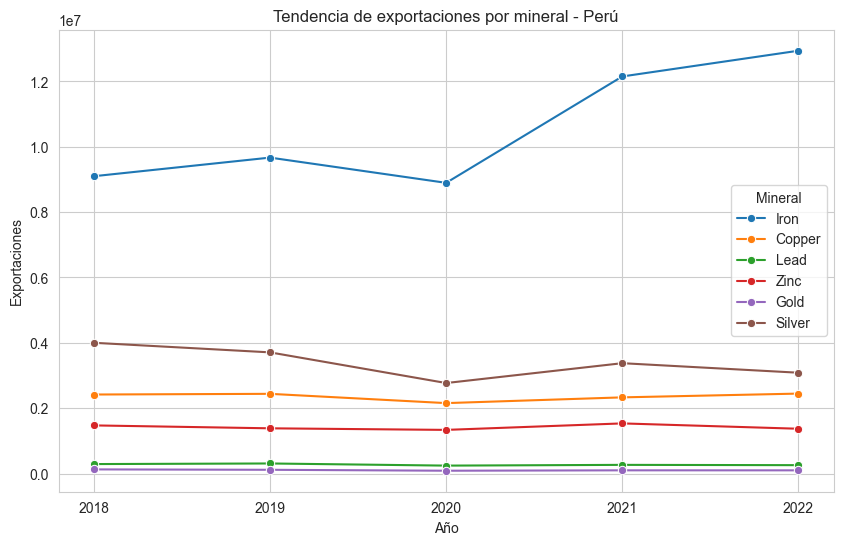

Ranking de empresas por mineral:
   Commodity                     Name  Count
0     Copper     Oroco Resource Corp.      1
1       Gold       Aben Minerals Ltd.      1
2       Gold  Asante Gold Corporation      1
3       Gold         Athena Gold Corp      1
4       Gold          Awalé Resources      1
5       Gold    Endomines Finland Oyj      1
6       Gold  Exploits Discovery Corp      1
7       Gold  Great Boulder Resources      1
8       Gold      Kobo Resources Inc.      1
9       Gold          Loncor Gold Inc      1
10      Gold       Scorpio Gold Corp.      1
Participación porcentual por empresa y mineral:
   Commodity                     Name  Percent
0     Copper     Oroco Resource Corp.    100.0
1       Gold       Aben Minerals Ltd.     10.0
2       Gold  Asante Gold Corporation     10.0
3       Gold         Athena Gold Corp     10.0
4       Gold          Awalé Resources     10.0
5       Gold    Endomines Finland Oyj     10.0
6       Gold  Exploits Discovery Corp     10.0
7  

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ======================
# 1️⃣ Cargar datasets
# ======================
df_commodities = pd.read_csv("../data/raw/world_mining_commodities_clean.csv", on_bad_lines='skip')
df_companies = pd.read_csv("../data/raw/116_world_mining_companies_clean.csv", on_bad_lines='skip')
df_info = pd.read_excel("../data/raw/commodity_info.xlsx")

# ======================
# 2️⃣ Filtrar datos
# ======================
minerales_clave = ['Copper', 'Gold', 'Zinc', 'Lead', 'Silver', 'Iron']

# Commodities: Perú + minerales clave
df_peru = df_commodities[df_commodities['country'] == 'Peru']
df_peru = df_peru[df_peru['mined_raw_mat'].isin(minerales_clave)]

# ======================
# 3️⃣ Transformar datos para análisis
# ======================
df_melt = df_peru.melt(id_vars=['country', 'mined_raw_mat', 'unit'],
                        value_vars=['2018','2019','2020','2021','2022'],
                        var_name='Year', value_name='Export')

# Convertir a float
df_melt['Export'] = pd.to_numeric(df_melt['Export'], errors='coerce')

# ======================
# 4️⃣ Gráfico de tendencia por mineral
# ======================
plt.figure(figsize=(10,6))
sns.lineplot(data=df_melt, x='Year', y='Export', hue='mined_raw_mat', marker='o')
plt.title("Tendencia de exportaciones por mineral - Perú")
plt.ylabel("Exportaciones")
plt.xlabel("Año")
plt.legend(title="Mineral")
plt.show()

# ======================
# 5️⃣ Ranking de empresas por mineral
# ======================
# Filtrar empresas que producen minerales clave
df_companies_peru = df_companies[df_companies['Commodity'].isin(minerales_clave)]

# Total exportaciones por empresa (si tienes columna de valor, aquí se puede sumar)
# Por ahora, solo contamos número de proyectos por mineral
ranking = df_companies_peru.groupby(['Commodity','Name']).size().reset_index(name='Count')
ranking = ranking.sort_values(['Commodity','Count'], ascending=[True, False])

print("Ranking de empresas por mineral:")
print(ranking)

# ======================
# 6️⃣ Participación porcentual por mineral
# ======================
percent = ranking.groupby('Commodity')['Count'].apply(lambda x: 100*x/x.sum()).reset_index(name='Percent')
percent = pd.concat([ranking[['Commodity','Name']], percent['Percent']], axis=1)

print("Participación porcentual por empresa y mineral:")
print(percent)


In [26]:
import pandas as pd

# 1️⃣ Filtrar solo Perú
df_peru = df_commodities[df_commodities['country'] == 'Peru'].copy()

# 2️⃣ Transformar datos de formato ancho a largo (long format)
df_peru_long = df_peru.melt(
    id_vars=['country', 'mined_raw_mat', 'unit'],
    value_vars=['2018', '2019', '2020', '2021', '2022'],
    var_name='Year',
    value_name='Export_value'
)

# Renombrar columnas para que sean más amigables
df_peru_long.rename(columns={'mined_raw_mat': 'Mineral'}, inplace=True)

# 3️⃣ Datos de empresas (filtrar columnas útiles si quieres)
df_companies_subset = df_companies[['Name', 'Commodity']].copy()
df_companies_subset.rename(columns={'Name': 'Company', 'Commodity': 'Mineral'}, inplace=True)

# 4️⃣ Combinar exportaciones por mineral con empresas (relación aproximada)
# Esto hará un merge simple para asignar exportaciones a empresas por mineral
df_final = df_peru_long.merge(df_companies_subset, on='Mineral', how='left')

# 5️⃣ Calcular total por mineral y participación porcentual por empresa
df_total_by_mineral = df_final.groupby(['Year', 'Mineral'])['Export_value'].sum().reset_index()
df_final = df_final.merge(df_total_by_mineral, on=['Year', 'Mineral'], suffixes=('', '_total'))
df_final['Percent_share'] = (df_final['Export_value'] / df_final['Export_value_total']) * 100

# 6️⃣ Seleccionar columnas finales para Power BI
df_powerbi = df_final[['country', 'Year', 'Mineral', 'Export_value', 'Company', 'Percent_share']]

# 7️⃣ Guardar CSV listo para Power BI
df_powerbi.to_csv('data/peru_mining_dashboard.csv', index=False)

print("✅ CSV listo para Power BI: 'data/peru_mining_dashboard.csv'")


✅ CSV listo para Power BI: 'data/peru_mining_dashboard.csv'


In [27]:
import os

# Crear carpeta 'data' si no existe
os.makedirs('data', exist_ok=True)

# Guardar CSV listo para Power BI
df_powerbi.to_csv('data/peru_mining_dashboard.csv', index=False)

print("✅ CSV listo para Power BI: 'data/peru_mining_dashboard.csv'")


✅ CSV listo para Power BI: 'data/peru_mining_dashboard.csv'


In [28]:
df_powerbi.head()


,country,Year,Mineral,Export_value,Company,Percent_share
0,Peru,2018,Iron,9096994.0,NaN,100.0
1,Peru,2018,Manganese,17203.0,NaN,100.0
2,Peru,2018,Molybdenum,28034.0,NaN,100.0
3,Peru,2018,Arsenic,20376.0,NaN,100.0
4,Peru,2018,Bismuth,145.0,NaN,100.0
